In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [46]:
data = pd.read_csv("/content/drive/MyDrive/linear regression/Random Forest/[Dataset]_Module8_(Insurance).csv")

Here's an explanation of the dataset based on the column names:

-capital-gains: Amount of capital gains associated with the claim.

-capital-loss: Amount of capital loss associated with the claim.

-incident_hour_of_the_day: The hour of the day when the incident o
ccurred.

-number_of_vehicles_involved: The number of vehicles involved in t
he incident.

-witnesses: Whether there were any witnesses to the incident (bina
ry feature).

-total_claim_amount: Total amount claimed for the insurance.

-fraud_reported: Whether fraud was reported (binary feature).

-insured_sex_FEMALE: Binary feature indicating if the insured pers
on is female.

-insured_sex_MALE: Binary feature indicating if the insured person
 is male.

-insured_occupation_...: Various features related to the occupatio
n of the insured person, each indicating a specific occupation.

-insured_hobbies_...: Various features related to the hobbies of t
he insured person, each indicating a specific hobby.

-incident_type_...: Various features related to the type of incide
nt, such as Multi-vehicle Collision, Single Vehicle Collision, etc.
-collision_type_...: Various features related to the type of colli
sion, such as Front Collision, Rear Collision, etc.

-incident_severity_...: Various features related to the severity o
f the incident, such as Major Damage, Minor Damage, etc.

-authorities_contacted_...: Various features related to the author
ities contacted after the incident, such as Police, Ambulance, etc.

-age_group_...: Various features representing age groups of the in
sured person.

-months_as_customer_groups_...: Various features representing the
duration of the insured person as a customer, grouped into ranges.

-policy_annual_premium_groups_...: Various features representing d
ifferent groups of annual premium amount
s.

In [47]:
data.head()

,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,0,53300,0,5,1,2,71610,1,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,8,1,0,5070,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,35100,0,7,3,3,34650,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,48900,-62400,5,1,2,63400,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,66000,-46000,20,1,1,6500,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [48]:
data.tail()

,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
995,995,0,0,20,1,1,87200,0,1,0,...,0,0,0,0,0,0,0,1,0,0
996,996,70900,0,23,1,3,108480,0,1,0,...,0,0,0,0,0,0,0,1,0,0
997,997,35100,0,4,3,3,67500,0,1,0,...,0,0,0,0,0,0,0,1,0,0
998,998,0,0,2,1,1,46980,0,0,1,...,0,0,0,1,0,0,0,1,0,0
999,999,0,0,6,1,3,5060,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              1000 non-null   int64
 1   capital-gains                           1000 non-null   int64
 2   capital-loss                            1000 non-null   int64
 3   incident_hour_of_the_day                1000 non-null   int64
 4   number_of_vehicles_involved             1000 non-null   int64
 5   witnesses                               1000 non-null   int64
 6   total_claim_amount                      1000 non-null   int64
 7   fraud_reported                          1000 non-null   int64
 8   insured_sex_FEMALE                      1000 non-null   int64
 9   insured_sex_MALE                        1000 non-null   int64
 10  insured_occupation_adm-clerical         1000 non-null   int64
 11  insured_occupation

In [50]:
data.columns

Index(['Unnamed: 0', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved', 'witnesses',
       'total_claim_amount', 'fraud_reported', 'insured_sex_FEMALE',
       'insured_sex_MALE', 'insured_occupation_adm-clerical',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'insured_hobbies_chess',
       'insured_hobbies_cross-fit', 'insured_hobbies_other',
       'incident_type_Multi-vehicle Collision', 'incident_type_Parked Car',
       'incident_typ

In [51]:
data["age_group_15-20"].value_counts()

0    998
1      2
Name: age_group_15-20, dtype: int64

In [52]:
a=data["age_group_21-25"].value_counts()
a

0    962
1     38
Name: age_group_21-25, dtype: int64

In [53]:
# prompt: generate grph using aboive code

b=data["age_group_15-20"].value_counts()
b


0    998
1      2
Name: age_group_15-20, dtype: int64

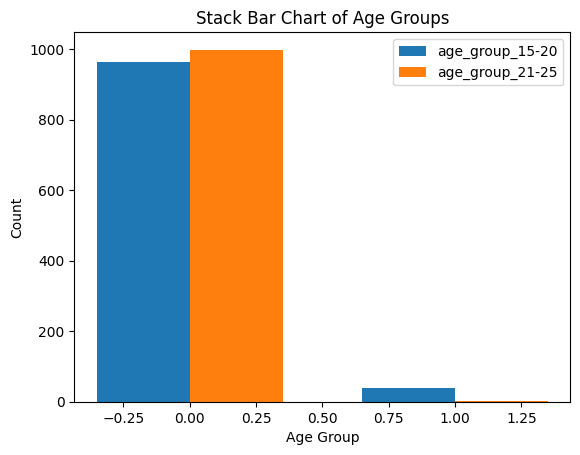

In [54]:
# prompt: generate stack bar chart using a and b variables

import numpy as np
import matplotlib.pyplot as plt

# Create the figure and axes
fig, ax = plt.subplots()

# Define the data
x = np.arange(len(a))
width = 0.35

# Create the bars
bar1 = ax.bar(x - width/2, a, width, label='age_group_15-20')
bar2 = ax.bar(x + width/2, b, width, label='age_group_21-25')

# Add labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Stack Bar Chart of Age Groups')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [55]:
data.shape

(1000, 69)

In [56]:
data.columns

Index(['Unnamed: 0', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved', 'witnesses',
       'total_claim_amount', 'fraud_reported', 'insured_sex_FEMALE',
       'insured_sex_MALE', 'insured_occupation_adm-clerical',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'insured_hobbies_chess',
       'insured_hobbies_cross-fit', 'insured_hobbies_other',
       'incident_type_Multi-vehicle Collision', 'incident_type_Parked Car',
       'incident_typ

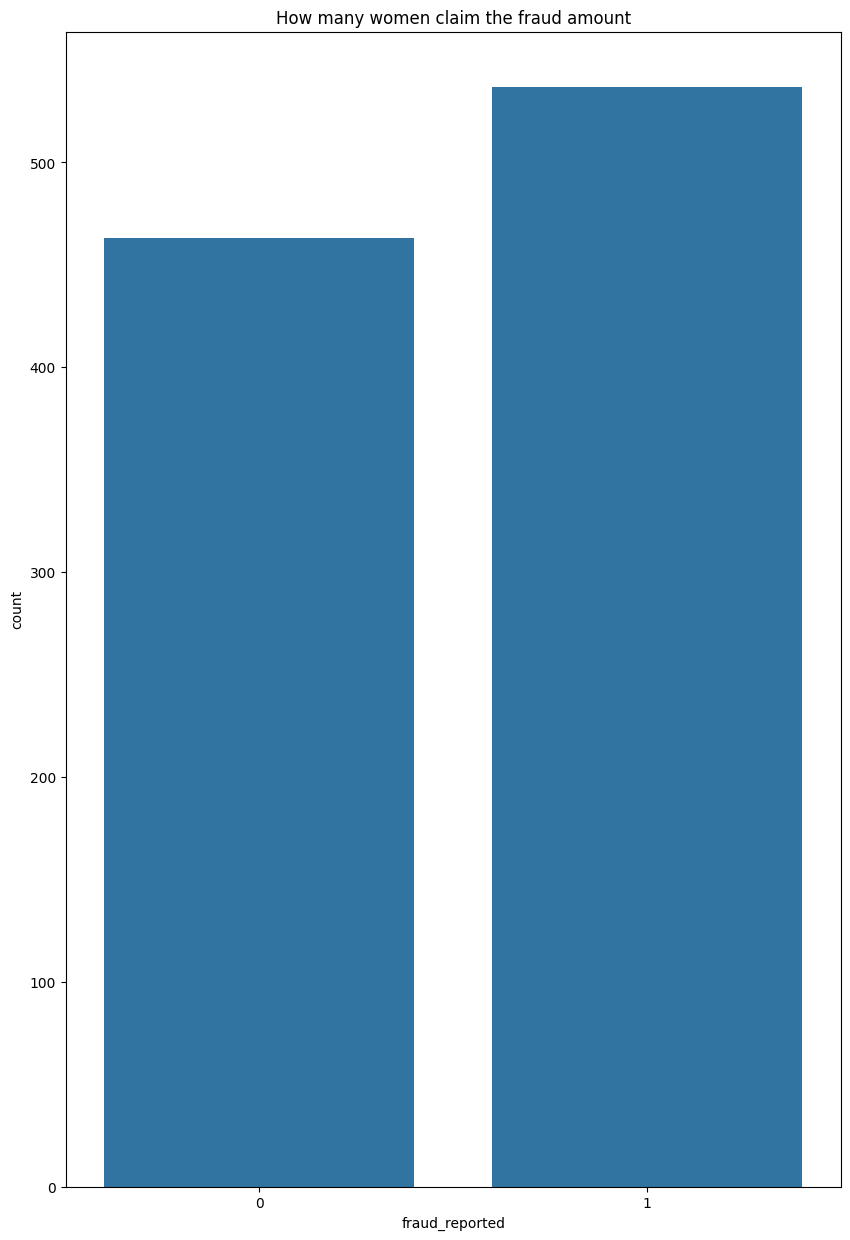

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
count = data['insured_sex_FEMALE'].value_counts()
plt.figure(figsize=(10,15))
sns.barplot( x=count.index,y=count.values)
plt.ylabel('count')
plt.xlabel('fraud_reported')
plt.title("How many women claim the fraud amount");
plt.show()

In [58]:
 data.insured_sex_MALE.value_counts()

0    537
1    463
Name: insured_sex_MALE, dtype: int64

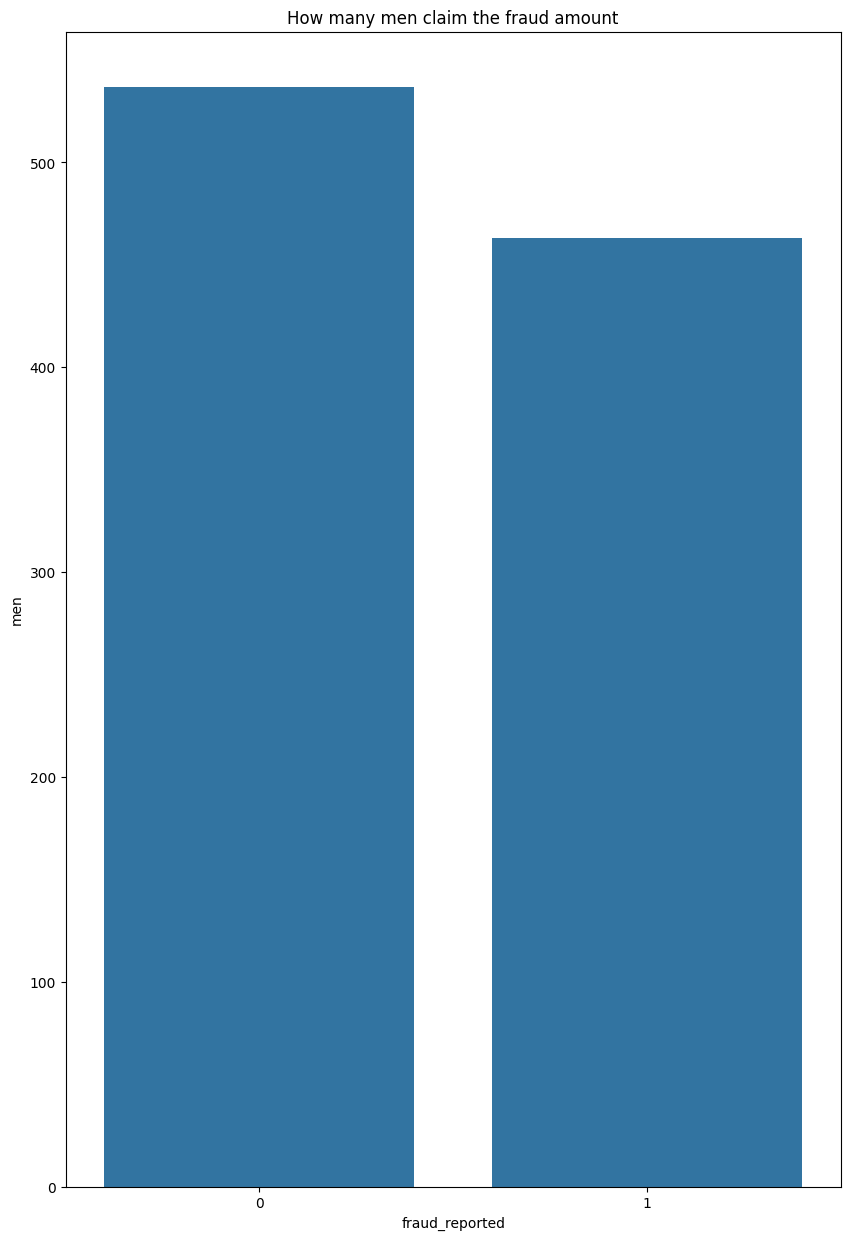

In [59]:
men = data['insured_sex_MALE'].value_counts()
plt.figure(figsize=(10,15))
sns.barplot( x=men.index,y=men.values)
plt.ylabel('men')
plt.xlabel('fraud_reported')
plt.title("How many men claim the fraud amount");
plt.show()

In [60]:
data.head()

,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,0,53300,0,5,1,2,71610,1,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,8,1,0,5070,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,35100,0,7,3,3,34650,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,48900,-62400,5,1,2,63400,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,66000,-46000,20,1,1,6500,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [61]:
data = data.drop(labels='Unnamed: 0',axis = 1)
data.columns

Index(['capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'witnesses', 'total_claim_amount',
       'fraud_reported', 'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_occupation_adm-clerical', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'insured_hobbies_chess',
       'insured_hobbies_cross-fit', 'insured_hobbies_other',
       'incident_type_Multi-vehicle Collision', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Coll

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 68 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   capital-gains                           1000 non-null   int64
 1   capital-loss                            1000 non-null   int64
 2   incident_hour_of_the_day                1000 non-null   int64
 3   number_of_vehicles_involved             1000 non-null   int64
 4   witnesses                               1000 non-null   int64
 5   total_claim_amount                      1000 non-null   int64
 6   fraud_reported                          1000 non-null   int64
 7   insured_sex_FEMALE                      1000 non-null   int64
 8   insured_sex_MALE                        1000 non-null   int64
 9   insured_occupation_adm-clerical         1000 non-null   int64
 10  insured_occupation_armed-forces         1000 non-null   int64
 11  insured_occupation

In [63]:
x = data[['capital-gains', 'capital-loss', 'incident_hour_of_the_day',
      'number_of_vehicles_involved', 'witnesses', 'total_claim_amount',
      'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_occupation_adm-clerical', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving','incident_type_Multi-vehicle Collision', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft',
       'collision_type_?', 'collision_type_Front Collision',
       'collision_type_Rear Collision', 'collision_type_Side Collision',
       'incident_severity_Major Damage', 'incident_severity_Minor Damage',
       'incident_severity_Total Loss', 'incident_severity_Trivial Damage',
       'authorities_contacted_Ambulance', 'authorities_contacted_Fire',
       'authorities_contacted_None', 'authorities_contacted_Other',
       'authorities_contacted_Police', 'age_group_15-20', 'age_group_21-25',
       'age_group_26-30', 'age_group_31-35', 'age_group_36-40',
       'age_group_41-45', 'age_group_46-50', 'age_group_51-55',
       'age_group_56-60', 'age_group_61-65', 'months_as_customer_groups_0-50',
       'months_as_customer_groups_101-150',
       'months_as_customer_groups_151-200',
       'months_as_customer_groups_201-250',
       'months_as_customer_groups_251-300',
       'months_as_customer_groups_301-350',
       'months_as_customer_groups_351-400',
       'months_as_customer_groups_401-450',
       'months_as_customer_groups_451-500', 'months_as_customer_groups_51-100',
       'policy_annual_premium_groups_high', 'policy_annual_premium_groups_low',
       'policy_annual_premium_groups_medium',
       'policy_annual_premium_groups_very high',
       'policy_annual_premium_groups_very low']]
x.head()

,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,insured_occupation_armed-forces,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,53300,0,5,1,2,71610,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,8,1,0,5070,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,35100,0,7,3,3,34650,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,48900,-62400,5,1,2,63400,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,66000,-46000,20,1,1,6500,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
y = data["fraud_reported"]
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=1)

print('x_train shape:',x_train.shape )
print('y_train shape:', y_train.shape)
print('x_test shape:',x_test.shape )
print('y_test shape:', y_test.shape)


x_train shape: (800, 64)
y_train shape: (800,)
x_test shape: (200, 64)
y_test shape: (200,)


In [66]:
clf = RandomForestClassifier(n_estimators=50, max_depth = 15) #n_estimators = numbers of trees(max_depth = 20)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=50)

In [67]:
y_train_pred_count1 = clf.predict(x_train)
y_test_pred_count1 = clf.predict(x_test)

In [68]:
accuracy_train = accuracy_score(y_train,y_train_pred_count1)
print(f"train accuracy:{accuracy_train}")
accuracy_test = accuracy_score(y_test,y_test_pred_count1)
print(f"test accuracy:{accuracy_test}")

train accuracy:0.99875
test accuracy:0.765


In [69]:
param_grid = {
    'n_estimators' : [100,200,300,350], # number of tree in the forest
    'max_depth' : [None,10,20,30], # Maximum depth of he tree
    'min_samples_split' : [2,5,10], # Minimum number of sample required to split an internal node
    'min_samples_leaf' : [1,2,4],   # Minimum number of samples required to be at a leaf node
}


In [70]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,param_grid=param_grid,n_jobs=-1)
# n_jobs = -1 for faster computation / parallization?

# fit the model with differen hyer parameters combinations
grid_search.fit(x_train,y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [71]:
best_params

{'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [72]:
test_accuracy = best_model.score(x_test,y_test)
test_accuracy

0.785